# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


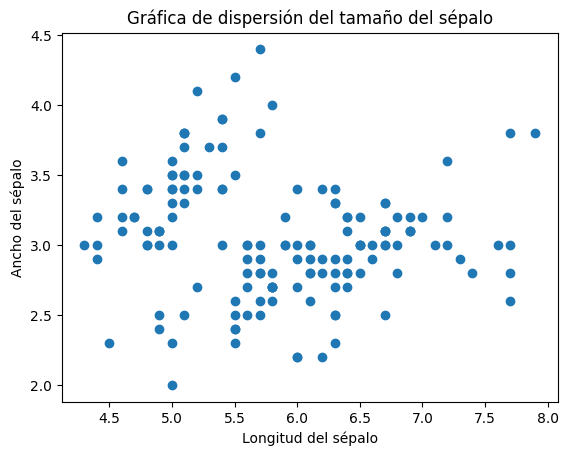

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


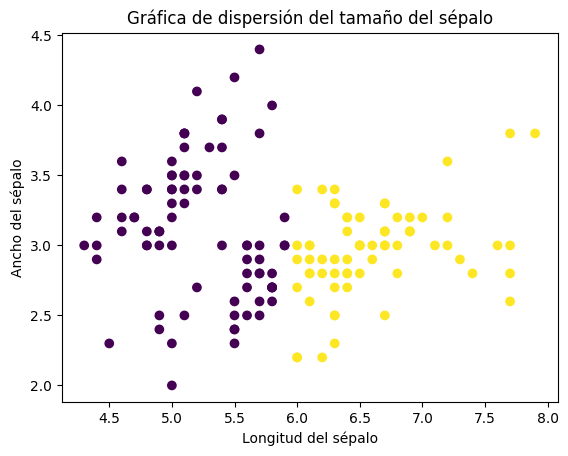

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


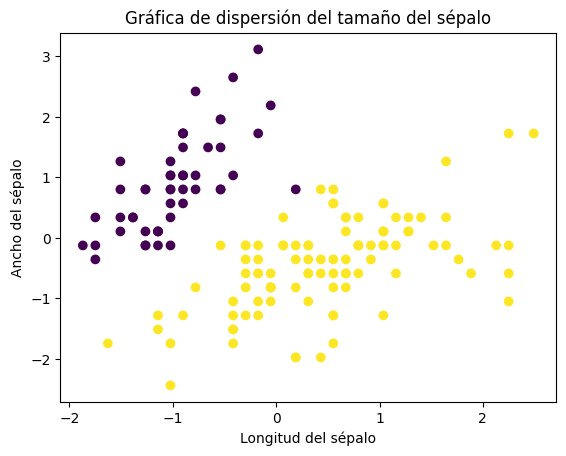

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

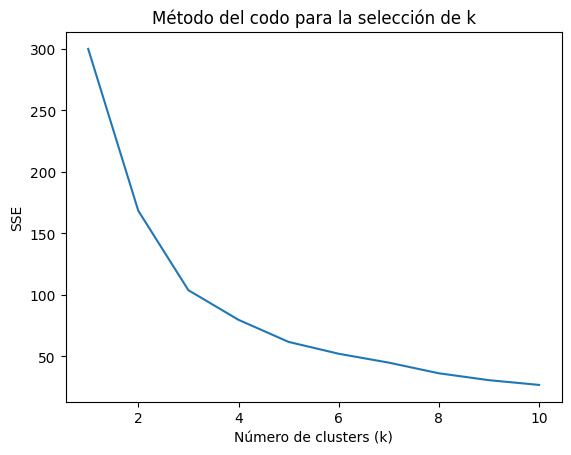

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


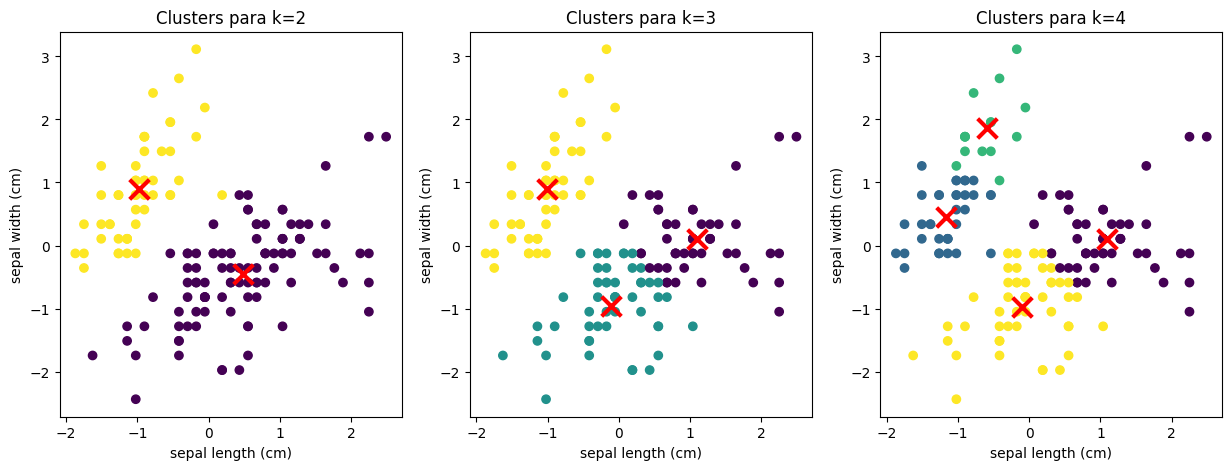

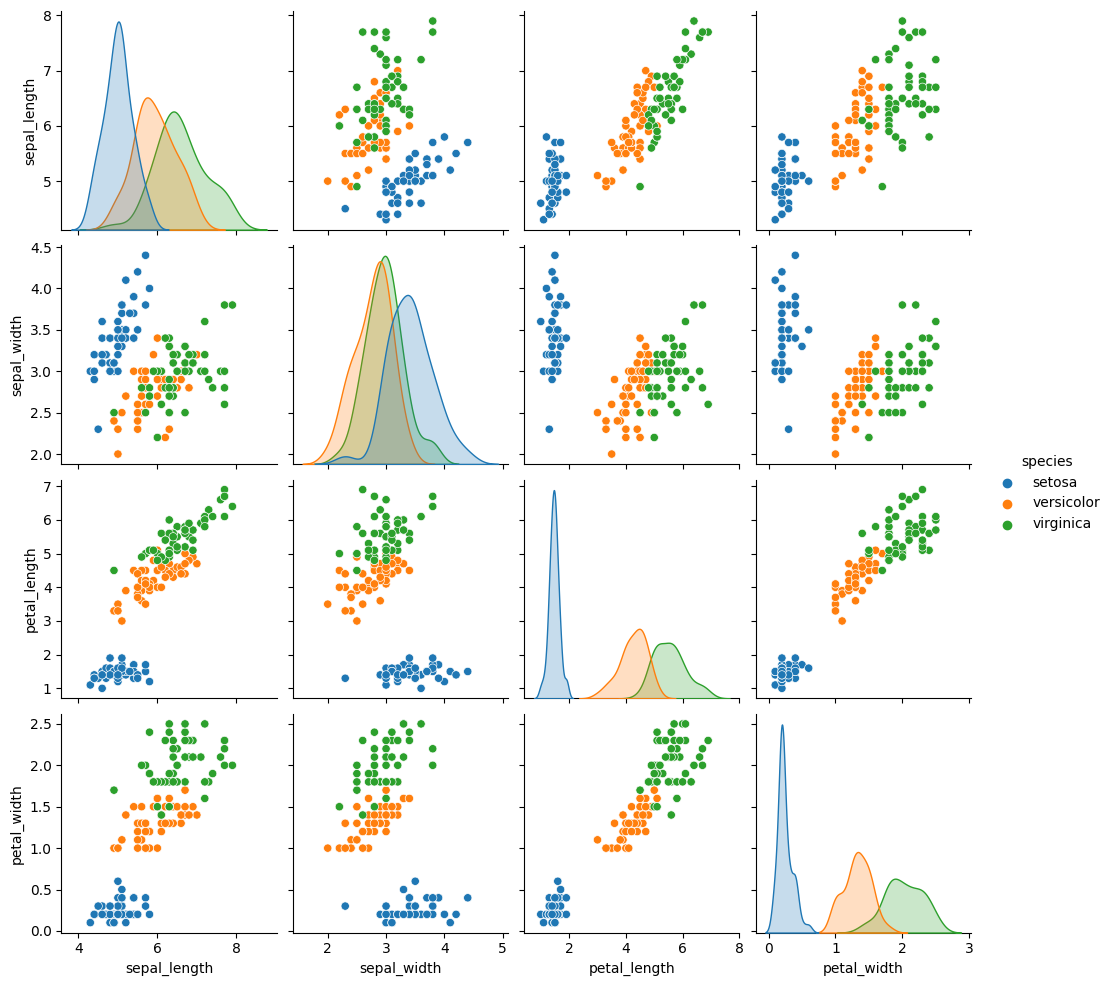

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Cargar datos
iris_data = pd.read_csv('iris.csv')

# Crear una gráfica de dispersión de los datos de longitud y ancho del sépalo
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'])
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(iris_data[['sepal_length', 'sepal_width']])

# Obtener las etiquetas de los clusters
labels = kmeans.predict(iris_data[['sepal_length', 'sepal_width']])

# Graficar los resultados
plt.scatter(iris_data['sepal_length'], iris_data['sepal_width'], c=labels)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()

# Crear una gráfica de dispersión de los datos de longitud y ancho del pétalo
scaler = StandardScaler()

# Estandarizar los datos
scaled_data = scaler.fit_transform(iris_data[['sepal_length', 'sepal_width']])

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)

# Graficar los resultados
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.title('Gráfica de dispersión del tamaño del sépalo')
plt.show()

sse = []
k_range = range(1, 11)

for k in k_range:
    # Creamos un modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
# Graficamos los resultados
plt.plot(k_range, sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo para la selección de k')
plt.show()

# Crear el modelo de clusterización con 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(scaled_data)

# Crear el modelo de clusterización con 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(scaled_data)

# Crear el modelo de clusterización con 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(scaled_data)

fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Graficamos los resultados para dos clusters
axs[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_2.labels_)
axs[0].scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[0].set_xlabel('sepal length (cm)')
axs[0].set_ylabel('sepal width (cm)')
axs[0].set_title('Clusters para k=2')

# Graficamos los resultados para tres clusters
axs[1].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_3.labels_)
axs[1].scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[1].set_xlabel('sepal length (cm)')
axs[1].set_ylabel('sepal width (cm)')
axs[1].set_title('Clusters para k=3')

# Graficamos los resultados para cuatro clusters
axs[2].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_4.labels_)
axs[2].scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[2].set_xlabel('sepal length (cm)')
axs[2].set_ylabel('sepal width (cm)')
axs[2].set_title('Clusters para k=4')

plt.show()

# Cargamos los datos con las respuestas
iris_data = pd.read_csv('iris-con-respuestas.csv')

# Graficamos los datos
sns.pairplot(iris_data, hue='species')
plt.show()

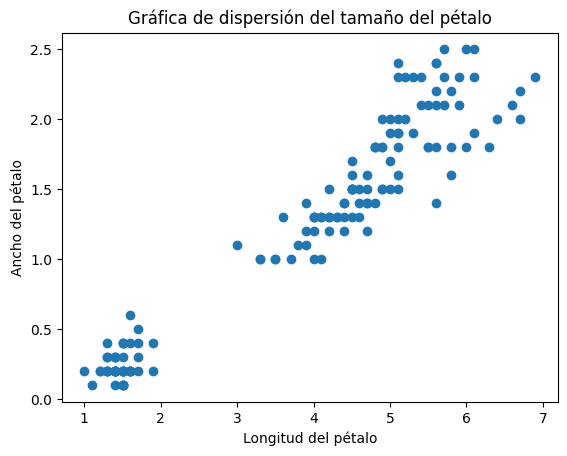

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


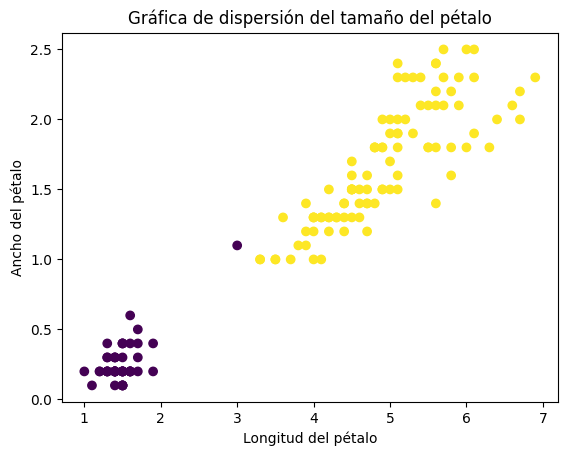

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


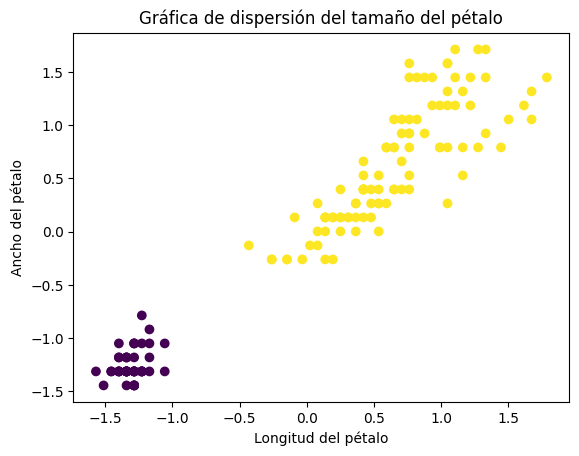

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

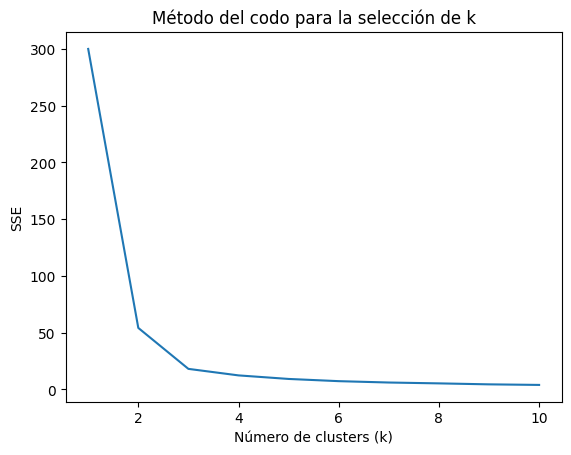

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


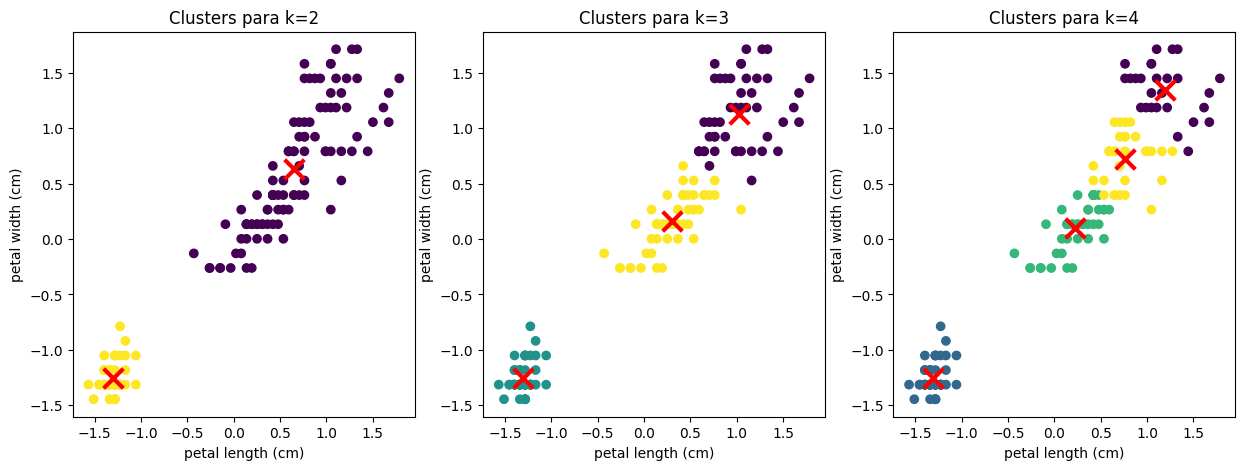

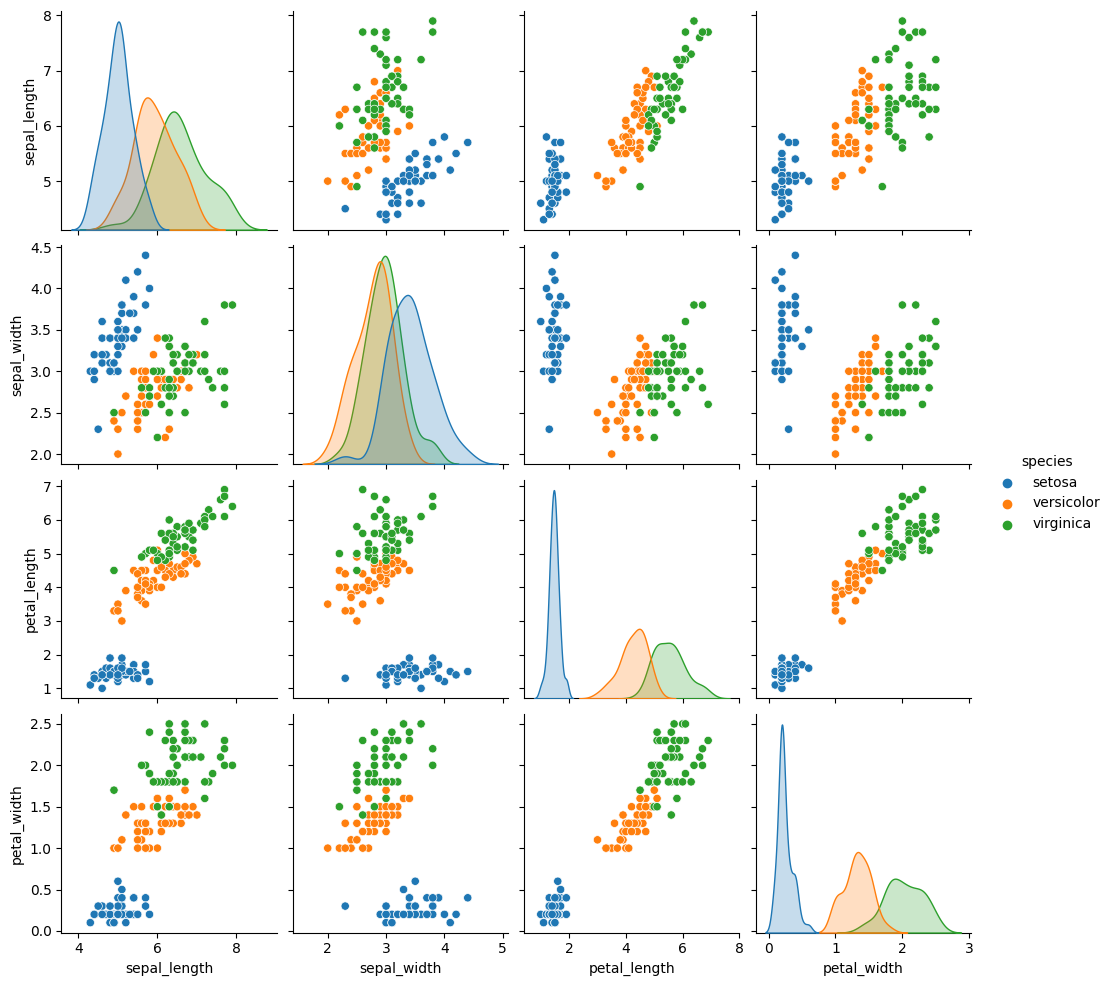

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Cargamos los datos
iris_data = pd.read_csv('iris.csv')

# Creen una gráfica de dispersión de los datos de longitud y ancho del pétalo
plt.scatter(iris_data['petal_length'], iris_data['petal_width'])
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Gráfica de dispersión del tamaño del pétalo')
plt.show()

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2)
kmeans.fit(iris_data[['petal_length', 'petal_width']])
labels = kmeans.predict(iris_data[['petal_length', 'petal_width']])

# Graficar los resultados
plt.scatter(iris_data['petal_length'], iris_data['petal_width'], c=labels)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Gráfica de dispersión del tamaño del pétalo')
plt.show()

# Crear una gráfica de dispersión de los datos de longitud y ancho del sépalo
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_data[['petal_length', 'petal_width']])

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)

# Graficar los resultados
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
plt.xlabel('Longitud del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Gráfica de dispersión del tamaño del pétalo')
plt.show()

sse = []
k_range = range(1, 11)

for k in k_range:
    # creamos un modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    
# Graficamos los resultados
plt.plot(k_range, sse)
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE')
plt.title('Método del codo para la selección de k')
plt.show()

# Creamos un modelo KMeans con 2 clusters y ajustamos el modelo a los datos estandarizados
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(scaled_data)

# Creamos un objeto KMeans con 3 clusters y ajustamos el modelo a los datos estandarizados
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(scaled_data)

# Creamos un objeto KMeans con 4 clusters y ajustamos el modelo a los datos estandarizados
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(scaled_data)

# Creamos una figura con 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Graficamos los resultados para dos clusters
axs[0].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_2.labels_)
axs[0].scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[0].set_xlabel('petal length (cm)')
axs[0].set_ylabel('petal width (cm)')
axs[0].set_title('Clusters para k=2')

# Graficamos los resultados para tres clusters
axs[1].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_3.labels_)
axs[1].scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[1].set_xlabel('petal length (cm)')
axs[1].set_ylabel('petal width (cm)')
axs[1].set_title('Clusters para k=3')

# Graficamos los resultados para cuatro clusters
axs[2].scatter(x=scaled_data[:,0], y=scaled_data[:,1], c=kmeans_4.labels_)
axs[2].scatter(kmeans_4.cluster_centers_[:,0], kmeans_4.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
axs[2].set_xlabel('petal length (cm)')
axs[2].set_ylabel('petal width (cm)')
axs[2].set_title('Clusters para k=4')

plt.show()

# Cargamos los datos con las respuestas
iris_data = pd.read_csv('iris-con-respuestas.csv')

# Graficamos los datos
sns.pairplot(iris_data, hue='species')
plt.show()

In [45]:
import pandas as pd
from kneed import KneeLocator

from sklearn.cluster import KMeans

df = pd.read_csv('iris.csv')
X = df.values

# Crear el modelo de clusterización
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

distortions = []
for i in range(1, 11):
    # Creamos un modelo KMeans con k clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Obtener el número óptimo de clusters 
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
print("Número óptimo de clusters:", kl.elbow)



Número óptimo de clusters: 3


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust